This notebook explain how to set up the initial population of clones for a simulation.  
The input required depend on whether the algorithm used is on a 2D grid or is non-spatial. 

In [1]:
# First, set up the notebook so that plots appear inline and import numpy
%matplotlib inline
import numpy as np

In [2]:
# Import the Parameters class, which is used to set up all simulations. 
from clone_competition_simulation import Parameters

There are a few ways to define the number of cells in each initial clone.  

## Method 1: Define the total initial cell population

This assigns all of the cells to a single clone (clone_id=0) and gives them all a fitness value of 1.  
It is most useful for simulations with ongoing mutation.  Without new mutations, very little happens.   

This method works for all algorithms.  

In [45]:
# Define a simulation with 1000 cells
p = Parameters(algorithm='Moran', initial_cells=1000, print_warnings=False, samples=10)
s = p.get_simulator()
s.run_sim()

# There is only one clone in the simulation. 
s.view_clone_info()

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1,0,-1,None


In [46]:
# For all algorithms apart from the "Branching" algorithm, the cell population is fixed. 
# This means that there is absolutely no change in the clone sizes. 
s.population_array.toarray()

array([[1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000., 1000.]])

In [50]:
# If we run the same thing with the Branching process, we see some random variation in the population size
p = Parameters(algorithm='Branching', initial_cells=1000, print_warnings=False, samples=10)
s = p.get_simulator()
s.run_sim()
s.population_array.toarray()

array([[1000.,  987.,  989., 1035., 1064., 1019., 1028., 1020.,  965.,
        1004., 1117.]])

<AxesSubplot:>

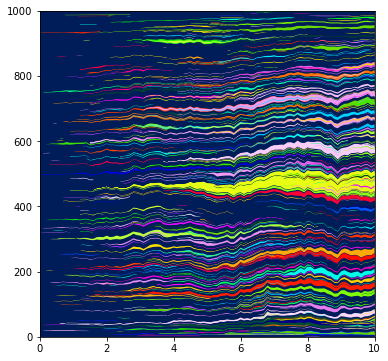

In [53]:
# Lets add a non-zero mutation rate
p = Parameters(algorithm='Moran', initial_cells=1000, print_warnings=False, mutation_rates=0.05)
s = p.get_simulator()
s.run_sim()

# The new mutations form clones which emerge from the initial clone. 
s.muller_plot(figsize=(6, 6), show_mutations_with_x=False)

In [59]:
# This can also be used with the 2D algorithms. 
# These will create a grid with equal width and height with the requested number of cells. 
# The 2D algorithms must have an even number of rows and columns for the periodic boundary conditions
# This means the initial_cells value must be the square number of an even number
p = Parameters(algorithm='Moran2D', initial_cells=30**2, print_warnings=False)
s = p.get_simulator()
s.run_sim()

In [58]:
# Trying with a non-square number throws an error
p = Parameters(algorithm='Moran2D', initial_cells=1000, print_warnings=False)

Error with parameters, unable to run simulation.

Square grid not compatible with 1000 cells. To run a rectangular grid provide a grid shape


SystemExit: 1

## Method 2: Defining multiple initial clones

If there are multiple initial clones, they can defined in the non-spatial models using the `initial_size_array`. 

If no further information is given, all initial clones are given a fitness of 1.   

This does not work with the 2D models, because the `initial_size_array` cannot define the spatial locations of the clones. 

In [60]:
# Define a simulation with 10 clones of increasing size
p = Parameters(algorithm='Moran', initial_size_array=np.arange(10, 110, 10), print_warnings=False)
s = p.get_simulator()
s.run_sim()

# There are multiple clones in the simulation
s.view_clone_info()

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1,0,-1,None
1,1,0,1,0,-1,None
2,2,0,1,0,-1,None
3,3,0,1,0,-1,None
4,4,0,1,0,-1,None
5,5,0,1,0,-1,None
6,6,0,1,0,-1,None
7,7,0,1,0,-1,None
8,8,0,1,0,-1,None
9,9,0,1,0,-1,None


<AxesSubplot:>

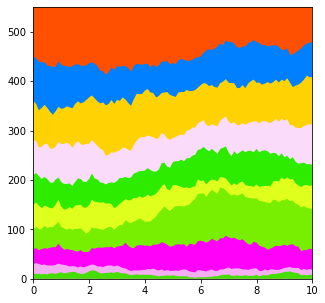

In [61]:
s.muller_plot(figsize=(5, 5))

## Method 3: Defining the initial grid of cells

For the 2D models (Moran2D and WF2D), you can provide a 2D numpy array to define the initial clone_id of every cell in the grid.   

If no further information is given, all initial clones are given a fitness of 1. 

In [68]:
# Here we have a grid of two clones with ids 0 and 1. 
initial_grid = np.repeat([0, 1], 50).reshape(10, 10)
initial_grid

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [70]:
# Run the simulation
p = Parameters(algorithm="Moran2D", initial_grid=initial_grid, print_warnings=False)
s = p.get_simulator()
s.run_sim()

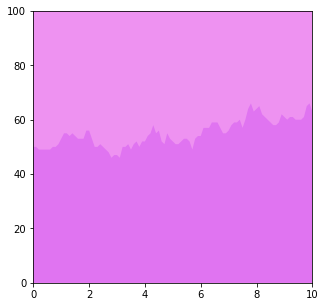

In [81]:
s.muller_plot(figsize=(5, 5));